In [5]:
import pandas as pd
#import matplotlib.pyplot as plt
import tensorflow as tf
import numpy
import sys

df = pd.read_csv("data/gender_voice_dataset.csv")
INPUT_SHAPE = 20
LABEL = 'label'
SPLIT_SIZE = 10
EPOCHS = 20

W1017 04:21:21.031618 12212 __init__.py:687] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [6]:
from sklearn.preprocessing import LabelEncoder
x = df.drop([LABEL], 1)
y = df[LABEL]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
#print(y)
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, Y_train = [], []
for i in range(0,SPLIT_SIZE):
    X_train.append(x[int((i*len(x)/SPLIT_SIZE)):(int((i+1)*len(x)/SPLIT_SIZE))])
    Y_train.append(y[(int(i*len(x)/SPLIT_SIZE)):(int((i+1)*len(x)/SPLIT_SIZE))])
    
#print(Y_train)

In [7]:
def model_build() :
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Dense(10, input_shape = (INPUT_SHAPE,), activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(10, activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model1

In [8]:
models = []
metrics = []
for i in range (0,SPLIT_SIZE):
    models.append(model_build())
    models[i].fit(X_train[i], Y_train[i], epochs = EPOCHS)

for i in range(0,SPLIT_SIZE):
    metrics.append(models[i].evaluate(x_test, y_test))

W1017 04:21:31.281274 12212 deprecation.py:506] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1017 04:21:31.458308 12212 deprecation.py:323] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1017 04:21:33.092742 12212 deprecation.py:323] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.p

Train on 253 samples
Epoch 1/20
253/253 [==============================] - 1s 2ms/sample - loss: 0.8446 - acc: 0.4941
Epoch 2/20
253/253 [==============================] - 0s 171us/sample - loss: 0.7922 - acc: 0.4941
Epoch 3/20
253/253 [==============================] - 0s 114us/sample - loss: 0.7514 - acc: 0.4980
Epoch 4/20
253/253 [==============================] - 0s 126us/sample - loss: 0.7248 - acc: 0.5020
Epoch 5/20
253/253 [==============================] - 0s 118us/sample - loss: 0.7031 - acc: 0.4941
Epoch 6/20
253/253 [==============================] - 0s 75us/sample - loss: 0.6850 - acc: 0.5455
Epoch 7/20
253/253 [==============================] - 0s 84us/sample - loss: 0.6801 - acc: 0.5652
Epoch 8/20
253/253 [==============================] - 0s 65us/sample - loss: 0.6743 - acc: 0.5415
Epoch 9/20
253/253 [==============================] - 0s 90us/sample - loss: 0.6753 - acc: 0.5375
Epoch 10/20
253/253 [==============================] - 0s 72us/sample - loss: 0.6753 - acc: 0.

Epoch 3/20
254/254 [==============================] - 0s 61us/sample - loss: 1.6775 - acc: 0.4567
Epoch 4/20
254/254 [==============================] - 0s 103us/sample - loss: 1.4238 - acc: 0.4488
Epoch 5/20
254/254 [==============================] - 0s 94us/sample - loss: 1.1948 - acc: 0.4567
Epoch 6/20
254/254 [==============================] - 0s 69us/sample - loss: 1.0480 - acc: 0.4764
Epoch 7/20
254/254 [==============================] - 0s 58us/sample - loss: 0.9704 - acc: 0.5079
Epoch 8/20
254/254 [==============================] - 0s 63us/sample - loss: 0.8728 - acc: 0.5669
Epoch 9/20
254/254 [==============================] - 0s 66us/sample - loss: 0.7947 - acc: 0.5709
Epoch 10/20
254/254 [==============================] - 0s 72us/sample - loss: 0.7386 - acc: 0.5354
Epoch 11/20
254/254 [==============================] - 0s 62us/sample - loss: 0.6899 - acc: 0.5315
Epoch 12/20
254/254 [==============================] - 0s 66us/sample - loss: 0.6969 - acc: 0.5433
Epoch 13/20
254/

In [9]:
sum = 0
for i in metrics:
    print(i[1])
    sum = sum + i[1]

average = sum/SPLIT_SIZE
print(average)

0.50630915
0.5741325
0.49526814
0.49053627
0.4873817
0.59621453
0.60567826
0.6214511
0.51419556
0.5157729
0.5406940072774887


In [10]:
m = models[0].get_weights()
for num in range(1,SPLIT_SIZE):
    a = models[num].get_weights()
    m = numpy.add(m,a)
m /= SPLIT_SIZE
model = model_build()
model.set_weights(m)
loss, acc = model.evaluate(x_test, y_test)
print(acc)
print(loss)  

634/634 [==============================] - 0s 240us/sample - loss: 0.7088 - acc: 0.5047
0.50473183
0.7087526530121403


In [ ]:
#Selecting random 5 models
import random
list2 = []
for i in range(0,5):
    list2.append(random.randrange(0,10))
print(list2)
m3 = models[list2[0]].get_weights()
for i in list2:
    a = models[i].get_weights()
    m3 = numpy.add(m2,a)
    print(i)

m3 /= 5
print(all([numpy.allclose(x, y) for x, y in zip(m, m3)]))
model3 = model_build()
model3.set_weights(m3)
loss, acc = model3.evaluate(x_test, y_test)
print(acc)
print(loss)  

In [42]:
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

num_parents_mating = int(sol_per_pop/2)
best_outputs = []
average_outputs = []
num_generations = 10
no_of_layers = 4

num_weights = 10
sol_per_pop = 10

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(size=pop_size)
for i in range(0,sol_per_pop):
    numsum = 0
    for j in range(0,num_weights):
        numsum += new_population[i][j]
    for j in range(0,num_weights):
        new_population[i][j] /= numsum
print(new_population)

[[0.01069084 0.01373888 0.1973898  0.12473489 0.0438235  0.08153809
  0.08075148 0.14767538 0.09467474 0.20498238]
 [0.00172322 0.18191985 0.09566979 0.02888304 0.06066779 0.19794256
  0.01494474 0.16243303 0.14884332 0.10697268]
 [0.20106675 0.08577025 0.0189388  0.01115411 0.01599114 0.2155325
  0.11179344 0.11456329 0.0953592  0.12983052]
 [0.16087152 0.00708322 0.15514691 0.0563433  0.08083334 0.14725166
  0.14139833 0.12332717 0.03106485 0.09667969]
 [0.16468178 0.04436578 0.0675064  0.06053037 0.05036067 0.06620545
  0.19755084 0.06454347 0.0958377  0.18841754]
 [0.05542565 0.0187365  0.06857904 0.16793498 0.21020977 0.0610287
  0.14248482 0.10194798 0.09599584 0.07765672]
 [0.10269462 0.02725114 0.00039878 0.19267268 0.15848199 0.02496855
  0.15131943 0.14973945 0.10400992 0.08846344]
 [0.01761027 0.0767564  0.11120593 0.14535868 0.09291968 0.18835383
  0.1093771  0.04250505 0.15980429 0.05610877]
 [0.02951111 0.07255166 0.03827703 0.17670954 0.11968301 0.1578733
  0.14522961 0.

In [43]:
def cal_pop_fitness(x_test, y_test, pop, num_weights):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.zeros(num_weights)
    for i,weights in enumerate(pop):
        x = float(weights[0])
        m = numpy.multiply(x,models[0].get_weights())
        for num in range(1,SPLIT_SIZE):
            x = float(weights[i])
            a = numpy.multiply(x,models[num].get_weights())
            m = numpy.add(m,a)
        model = model_build()
        model.set_weights(m)
        loss, acc = model.evaluate(x_test, y_test)
        fitness[i] = acc
    
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.argmax(fitness)
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    
    for i in range(offspring_crossover.shape[0]):
        numsum = 0
        for j in range(num_weights):
            numsum += offspring_crossover[i][j]
        for j in range(0,num_weights):
            offspring_crossover[i][j] /= numsum
    return offspring_crossover


In [44]:
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(x_test, y_test, new_population, num_weights)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(fitness))
    average_outputs.append(numpy.sum(fitness)/num_weights)
    # The best result in the current iteration.
    print("Best result : ", numpy.max(fitness))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation :  0
634/634 [==============================] - 1s 1ms/sample - loss: 0.6953 - acc: 0.5032
Fitness
[0.52523661 0.52523661 0.51104099 0.51104099 0.51104099 0.50157726
 0.50315458 0.5126183  0.50315458 0.50315458]
Best result :  0.5252366065979004
Parents
[[0.01069084 0.01373888 0.1973898  0.12473489 0.0438235  0.08153809
  0.08075148 0.14767538 0.09467474 0.20498238]
 [0.00172322 0.18191985 0.09566979 0.02888304 0.06066779 0.19794256
  0.01494474 0.16243303 0.14884332 0.10697268]
 [0.01761027 0.0767564  0.11120593 0.14535868 0.09291968 0.18835383
  0.1093771  0.04250505 0.15980429 0.05610877]
 [0.20106675 0.08577025 0.0189388  0.01115411 0.01599114 0.2155325
  0.11179344 0.11456329 0.0953592  0.12983052]
 [0.16087152 0.00708322 0.15514691 0.0563433  0.08083334 0.14725166
  0.14139833 0.12332717 0.03106485 0.09667969]]
Crossover
[[0.01069084 0.01373888 0.1973898  0.12473489 0.0438235  0.19794256
  0.01494474 0.16243303 0.14884332 0.10697268]
 [0.00172322 0.18191985 0.09566979 

634/634 [==============================] - 1s 1ms/sample - loss: 0.6899 - acc: 0.5252
Fitness
[0.52523661 0.52523661 0.52523661 0.52523661 0.42271292 0.52523661
 0.49211356 0.52523661 0.49526814 0.52523661]
Best result :  0.5252366065979004
Parents
[[ 0.01069084  0.01373888  0.1973898   0.12473489  0.0438235   0.08153809
   0.08075148  0.14767538  0.09467474  0.20498238]
 [ 0.00172322  0.18191985  0.09566979  0.02888304  0.06066779  0.19794256
   0.01494474  0.16243303  0.14884332  0.10697268]
 [ 0.01761027  0.0767564   0.11120593  0.14535868  0.09291968  0.18835383
   0.1093771   0.04250505  0.15980429  0.05610877]
 [ 0.00124193  0.13111068  0.06894976  0.02081617 -0.17178949  0.13574768
   0.07882871  0.03063363  0.11517187  0.58928905]
 [ 0.00462945  0.00594934  0.08547563  0.0540139   0.14414738  0.08571499
   0.00647151  0.07033831  0.06445357  0.47880591]]
Crossover
[[ 0.01069084  0.01373888  0.1973898   0.12473489  0.0438235   0.19794256
   0.01494474  0.16243303  0.14884332  0.

634/634 [==============================] - 1s 2ms/sample - loss: 161.7959 - acc: 0.4937
Fitness
[0.52523661 0.52523661 0.52523661 0.52523661 0.52523661 0.52523661
 0.49526814 0.51577288 0.47003156 0.49369085]
Best result :  0.5252366065979004
Parents
[[ 0.01069084  0.01373888  0.1973898   0.12473489  0.0438235   0.08153809
   0.08075148  0.14767538  0.09467474  0.20498238]
 [ 0.00172322  0.18191985  0.09566979  0.02888304  0.06066779  0.19794256
   0.01494474  0.16243303  0.14884332  0.10697268]
 [ 0.01761027  0.0767564   0.11120593  0.14535868  0.09291968  0.18835383
   0.1093771   0.04250505  0.15980429  0.05610877]
 [ 0.00124193  0.13111068  0.06894976  0.02081617 -0.17178949  0.13574768
   0.07882871  0.03063363  0.11517187  0.58928905]
 [ 0.00462945  0.00594934  0.08547563  0.0540139   0.14414738  0.08571499
   0.00647151  0.07033831  0.06445357  0.47880591]]
Crossover
[[ 0.01069084  0.01373888  0.1973898   0.12473489  0.0438235   0.19794256
   0.01494474  0.16243303  0.14884332  

634/634 [==============================] - 1s 2ms/sample - loss: 1.5780 - acc: 0.4243
Fitness
[0.52523661 0.52523661 0.52523661 0.52523661 0.52523661 0.52523661
 0.4258675  0.5        0.49842271 0.42429021]
Best result :  0.5252366065979004
Parents
[[ 0.01069084  0.01373888  0.1973898   0.12473489  0.0438235   0.08153809
   0.08075148  0.14767538  0.09467474  0.20498238]
 [ 0.00172322  0.18191985  0.09566979  0.02888304  0.06066779  0.19794256
   0.01494474  0.16243303  0.14884332  0.10697268]
 [ 0.01761027  0.0767564   0.11120593  0.14535868  0.09291968  0.18835383
   0.1093771   0.04250505  0.15980429  0.05610877]
 [ 0.00124193  0.13111068  0.06894976  0.02081617 -0.17178949  0.13574768
   0.07882871  0.03063363  0.11517187  0.58928905]
 [ 0.00462945  0.00594934  0.08547563  0.0540139   0.14414738  0.08571499
   0.00647151  0.07033831  0.06445357  0.47880591]]
Crossover
[[ 0.01069084  0.01373888  0.1973898   0.12473489  0.0438235   0.19794256
   0.01494474  0.16243303  0.14884332  0.

634/634 [==============================] - 1s 2ms/sample - loss: 1.1482 - acc: 0.4274
Best solution :  [[[ 1.06908391e-02  1.37388783e-02  1.97389803e-01  1.24734894e-01
    4.38235046e-02  8.15380944e-02  8.07514828e-02  1.47675379e-01
    9.46747403e-02  2.04982385e-01]
  [ 1.72321714e-03  1.81919846e-01  9.56697853e-02  2.88830422e-02
    6.06677854e-02  1.97942565e-01  1.49447368e-02  1.62433025e-01
    1.48843316e-01  1.06972681e-01]
  [ 1.76102674e-02  7.67563963e-02  1.11205933e-01  1.45358678e-01
    9.29196809e-02  1.88353827e-01  1.09377102e-01  4.25050453e-02
    1.59804295e-01  5.61087747e-02]
  [ 1.24193249e-03  1.31110677e-01  6.89497635e-02  2.08161743e-02
   -1.71789489e-01  1.35747685e-01  7.88287052e-02  3.06336302e-02
    1.15171873e-01  5.89289048e-01]
  [ 4.62945005e-03  5.94934132e-03  8.54756328e-02  5.40139044e-02
    1.44147378e-01  8.57149949e-02  6.47151380e-03  7.03383122e-02
    6.44535656e-02  4.78805907e-01]
  [ 9.21553912e-03  1.18429591e-02  1.70150672e

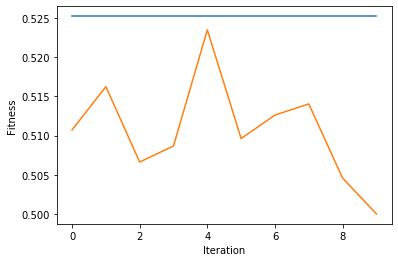

In [47]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(x_test,y_test, new_population, num_weights)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.argmax(fitness)

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

x = [0,1,2,3,4,5,6,7,8,9]
import matplotlib.pyplot
matplotlib.pyplot.plot(x, best_outputs)
matplotlib.pyplot.plot(x, average_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [46]:
for i in range(sol_per_pop):
    print(numpy.sum(new_population[i]))

1.0
1.0
1.0
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
1.0


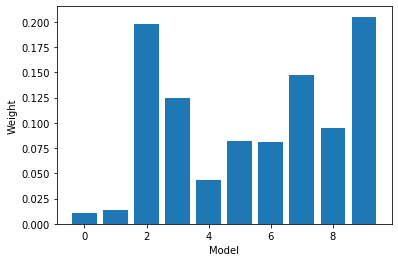

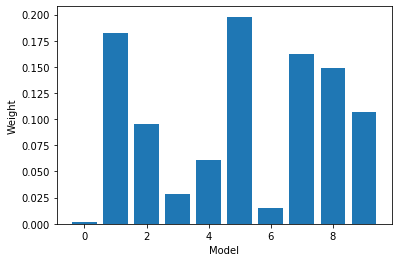

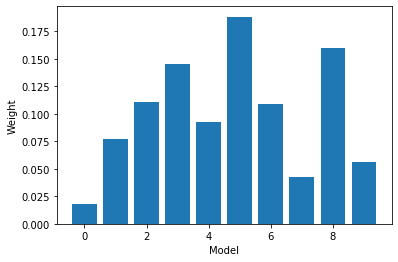

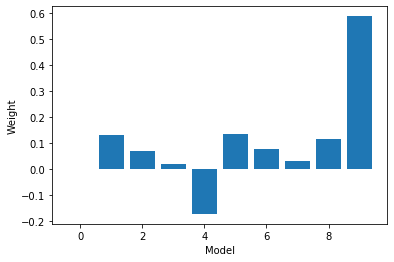

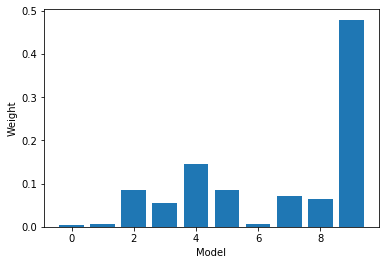

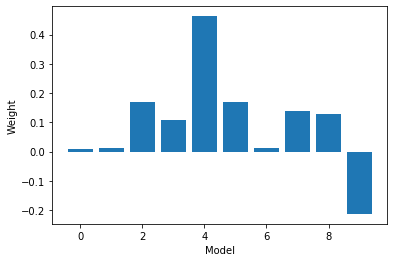

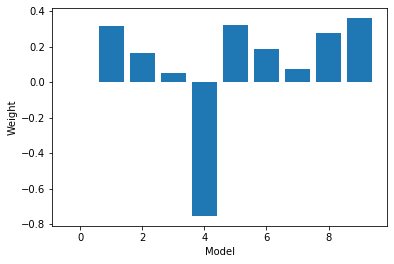

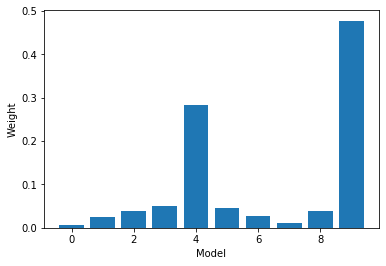

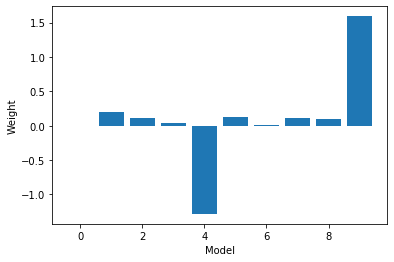

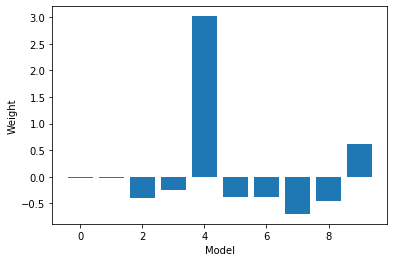

In [52]:
x = numpy.arange(num_weights)
for i in range(sol_per_pop):
    matplotlib.pyplot.bar(x, new_population[i])
    matplotlib.pyplot.xlabel("Model")
    matplotlib.pyplot.ylabel("Weight")
    matplotlib.pyplot.show()